# Prácticas ESAC: Comparations of the results and summary

1. Histograms: Strömgren radius R$_{HII}$
2. Plots: $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$ vs all parameters
3. Plots: $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$ vs all parameters with $f_{esc, Ly \alpha}$ = 0.6 in $R^{sobral}_{HII}$ relation
4. $R^{sobral}_{HII}$ vs redshift

$\textit{Juan A. Molina-Calzada}$

En este cuaderno vamos a recopilar los resultados mas importantes. En primer lugar, representaremos unos histogramas para ver la distribución de los radios de Strömgren para las diferentes, y todas, las muestras. En la segunda sección graficaremos el cociente entre el radio de Strömgren de Sobral y Yajima frente a los diferentes parámetros: fracciones de escape, redshift, EW, luminosidades de Lyman alpha, ... .

Exportamos los datos y paquetes.

In [1]:
# Packages
from astropy.table import Table, QTable, unique, vstack
from astropy.io import ascii
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import smplotlib
from uncertainties import ufloat, unumpy

# Definimos Mpc en unidades propias comóviles
pMpc = u.def_unit('pMpc')
cMpc = u.def_unit('cMpc')

# Data
Kerutt22_filter_v1 = QTable.read('/home/juanan/Escritorio/Juanan/Estudios/Master_en_Astrofisica/Practicas_ESAC/MyJob/stromgren_radius/Kerutt22_filter_v1.dat', format = 'ascii', delimiter = ' ')
Hu18_filter_v1 = QTable.read('/home/juanan/Escritorio/Juanan/Estudios/Master_en_Astrofisica/Practicas_ESAC/MyJob/stromgren_radius/Hu18_filter_v1.dat', format = 'ascii', delimiter = ' ')
Jung20_filter_v1 = QTable.read('/home/juanan/Escritorio/Juanan/Estudios/Master_en_Astrofisica/Practicas_ESAC/MyJob/stromgren_radius/Jung20_filter_v1.dat', format = 'ascii', delimiter = ' ')
Tilvi20_filter_v1 = QTable.read('/home/juanan/Escritorio/Juanan/Estudios/Master_en_Astrofisica/Practicas_ESAC/MyJob/stromgren_radius/Tilvi20_filter_v1.dat', format = 'ascii', delimiter = ' ')

## 1. Histograms: Strömgren radius R$_{HII}$

Representamos los histogramas del radio de Strömgren para cada muestra y para todas las muestras. Nótese que este radio de Strömgren, llamado _'R_s'_ en la mayoria de los casos, es el radio de Strömgren en equilibrio, es decir, el calculado en otros cuadernos por medio de la siguiente expresión,

$$
\begin{equation}
    R_s = \left(\frac{3 \dot{N}_{ion}}{4\pi C_H \langle n_H \rangle ^ 2 \alpha_B}\right)^{1/3},
\end{equation}
$$

donde $\dot{N}_{ion}$ se corresponde con el número de fotones del continuo ionizante, según las definciones en [Reionized-Bubble-published](https://watermark.silverchair.com/mnrasl_495_1_l17.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAA3UwggNxBgkqhkiG9w0BBwagggNiMIIDXgIBADCCA1cGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMesIRyAw1IMhjJgxLAgEQgIIDKNLnPEZWRv4H07eC47gxYs3YVUGv5PmSrfVEViCuE9OGjq7ro9MHhMyPmAakzFX36UUoujJ_iE9CnliM-I7rMh4z7mOeffZzdY6hfOyq00dea8-Lq1pWKHV4W24VMD60GNXdkNjd2aavHQncseS1xETCLGjWV75goKbuh_yg9nXTHI6v6S2MA0fKTlzk56zTvu3069rRq-WpUdLuyv0U6NSQNNtqfWMR468NbLLTfIHve9wfcSxGB-iHQiIJD0nQVAkDzO-LT1nxBzsiES0EvVeGqMNtyfLWRrMX8NxIJaaGEljDw5QQtk3ogx7j5QCeYpUBYY7__mlZBc8-pdDzOQ5ALXsasW69Qkf1sSmFzIvTPaMEK9YUN8axtA9iJViI5U33clBDs8xa0nJi5GA1IsnB9Elr1WP06eTj6v-HQeNqO5w4vP9vKIYTsDRvFzuu6U-Ok0Kw0aH2ybnJAVYQ8qfFRo29CcuPwsu8UVwCpISBnRl-269GGOHYzPoEzJrp_dWBnvXTYh6TTl0178RJhmDySOlH5Ie4tMfe-dp4cdQnhl0z-x4MQRIG_SDb3Xo-crH844EffwRQ5EnsktfdoMwXXvndvakMYFzSCSYEnJU1ZhMCUPH3IeyMQS1IXNM05Qm8QGW1OlUrqIvLDMjlCZeWptQ6X7mX5lX9jph4M9eKAelJw-dZjqlhm6NHjGS7FjhfsczkoehMAi87W5bm6FPbQlTpzEdDoNfMcc3GPH1SEbdltmN8j6TrfTA5pk2JFqntSzJJC99DHJzDeSWGumc1zg4FrP7vkUC4yAGgoMsSac6IL_SpwXEKc9sKB9ezu5PVy4NrWL7sc-xSmau0sVn8g_wP25TePV25N4Z8GxAE1cV_PPHKOFJU21pomgFaZdxyPxENLoyx9v64JuoXhi48PWuV9V1JPAXatkS2q3VTz5hRGiUD9nxqy7DbU6jVmZwqErVDNamfyN_0H7VxMEOm5sa65jZyHaGtyknwQq6fktLmskgK_kmotgnM2rZWexXFBGzK5USVEwHe-iA7Ri0pKvudfX8MtFVjs8HZGOqBvO118nGdD3Q). es decir,

$$
\begin{equation}
    \dot{N}_{ion} = \frac{Q_{ion}}{1-f_{esc,LyC}} \cdot f_{esc,LyC} .
\end{equation}
$$

#### Samples

Realizamos primero los hitogramas para los samples por separado.

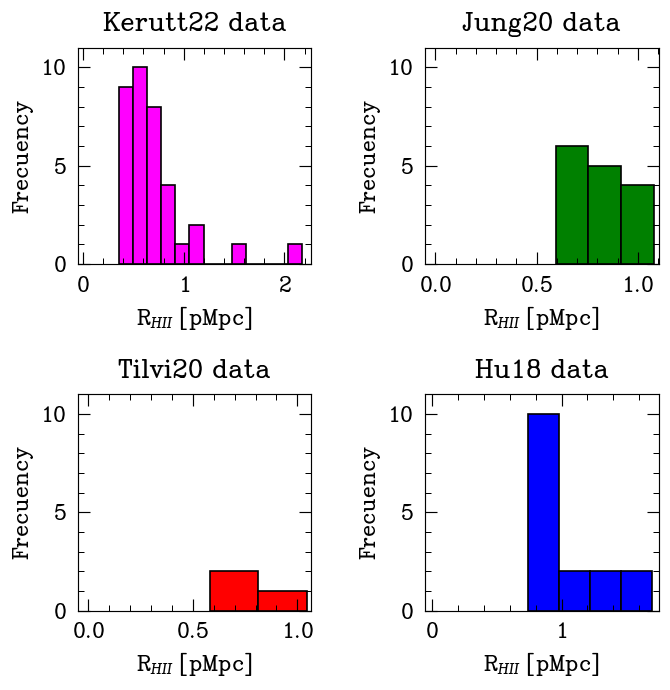

In [2]:
# Histograms for subsamples
fig, axs = plt.subplots(2, 2)

titles = ['Kerutt22 data', 'Jung20 data', 'Tilvi20 data', 'Hu18 data']
datasets = [Kerutt22_filter_v1, Jung20_filter_v1, Tilvi20_filter_v1, Hu18_filter_v1]
collist = ['magenta', 'green', 'red', 'blue']

for i, (dataset, title) in enumerate(zip(datasets, titles)):

    bins_fd = np.histogram_bin_edges(dataset['R_s'].value, bins='fd') 
    ax = axs[i//2, i%2]
    ax.hist(dataset['R_s'].value, bins = bins_fd, color = collist[i], edgecolor = 'black') # Strömgren radius calcualted by Sobral Relation
    ax.set_xlabel(r'R$_{HII}$ [pMpc]')
    ax.set_xlim(left = -0.05)
    ax.set_ylim(top = 11)
    ax.set_ylabel('Frecuency')
    ax.set_title(title)

plt.tight_layout()
plt.show()

#### All data

Juntos todos los samples en un sólo y repetimos el histograma. 

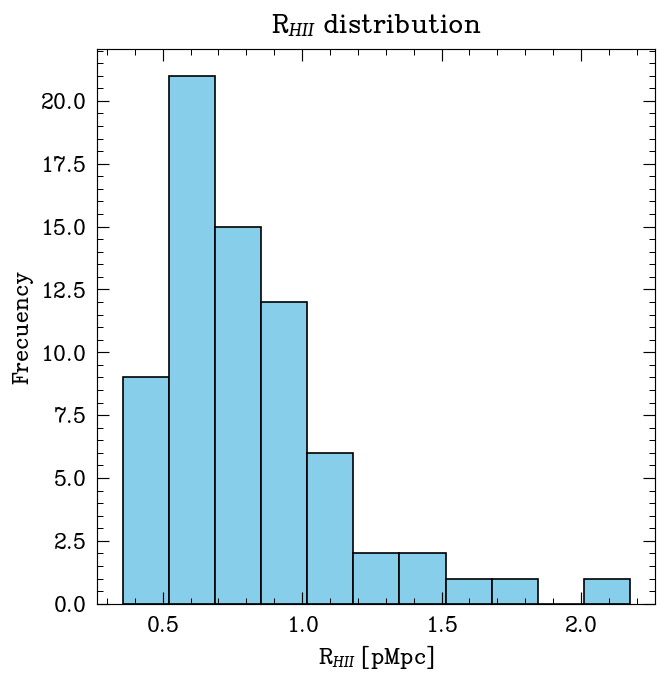

In [3]:
# Histogram for all sample
all_data = np.concatenate([Kerutt22_filter_v1['R_s'].value,
                           Hu18_filter_v1['R_s'].value,
                           Jung20_filter_v1['R_s'].value,
                           Tilvi20_filter_v1['R_s'].value]) # Strömgren radius calcualted by Sobral Relation

bins_fd = np.histogram_bin_edges(all_data, bins = 'fd')

fig, ax = plt.subplots()
ax.hist(all_data, bins = bins_fd, color = 'skyblue', edgecolor = 'black') 
ax.set_xlabel(r'R$_{HII}$ [pMpc]')
ax.set_ylabel('Frecuency')
ax.set_title('R$_{HII}$ distribution')

plt.show()

Por último, representamos la misma figura pero asignando un color diferente a cada set de datos. 

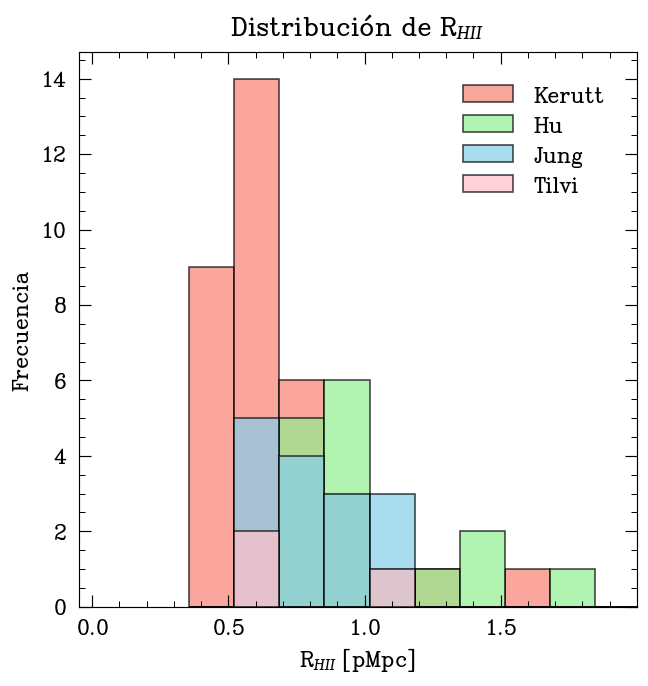

In [4]:
# Calcular los bins usando el método de Freedman-Diaconis
bins_fd = np.histogram_bin_edges(all_data, bins='fd')

# Configurar colores para cada conjunto de datos
colors = ['salmon', 'lightgreen', 'skyblue', 'pink']
data_names = ['Kerutt', 'Hu', 'Jung', 'Tilvi']

# Crear el histograma
fig, ax = plt.subplots()
for i, data in enumerate([Kerutt22_filter_v1['R_s'].value,
                          Hu18_filter_v1['R_s'].value,
                          Jung20_filter_v1['R_s'].value,
                          Tilvi20_filter_v1['R_s'].value]):
    ax.hist(data, bins=bins_fd, color=colors[i], edgecolor='black', alpha=0.7, label=data_names[i])

ax.set_xlabel(r'R$_{HII}$ [pMpc]')
ax.set_ylabel('Frecuencia')
ax.set_xlim(-0.05, 1.999)
ax.set_title('Distribución de R$_{HII}$')
ax.legend()

plt.show()


## 2. Plots: $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$ vs all parameters

En esta sección, vamos a representar $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$ frente a diferentes parámetros como el redshift z, la anchura equivalente EW, la luminosidad de Lyman alpha como $log{L_{Ly\alpha}}$ o frente a la fracción de escape $f_{esc,Ly\alpha}$. El objetivo es ver en que rangos de estos parámetros se producen diferencias significatvias entre el radio de Strömgren calculado por un métood u otro. 

Nota: algunos valores del radio de Strömgren de Yajima que vamos a utilizar los tenemos que corregir previamente puesto que están en cMpc y nos interesa tenerlos en pMpc. Esto lo corregimos con facilidad al principio de la celda.

In [40]:
# Correction: cMpc to pMcp
R_s_prop_Hu = Hu18_filter_v1['R'].value / (1 + Hu18_filter_v1['Redshift'].value) * pMpc # radios Strömgren por Yajima de cMpc to pMpc

# Strömgren radius calcualted by Sobral Relation
R_s_sobral = np.concatenate([Kerutt22_filter_v1['R_s'].value,
                           Hu18_filter_v1['R_s'].value,
                           Jung20_filter_v1['R_s'].value,
                           Tilvi20_filter_v1['R_s'].value]) # Strömgren radius calcualted by Sobral Relation (in pMpc)

R_s_yajima = np.concatenate([Kerutt22_filter_v1['R_HII'].value,
                           R_s_prop_Hu.value,
                           Jung20_filter_v1['HII_Radii'].value,
                           Tilvi20_filter_v1['HII_radii'].value]) # Strömgren radius calcualted by Yajima (in pMpc)

# Radius ratio
ratio_radius = R_s_sobral / R_s_yajima

#### Redshift (z)

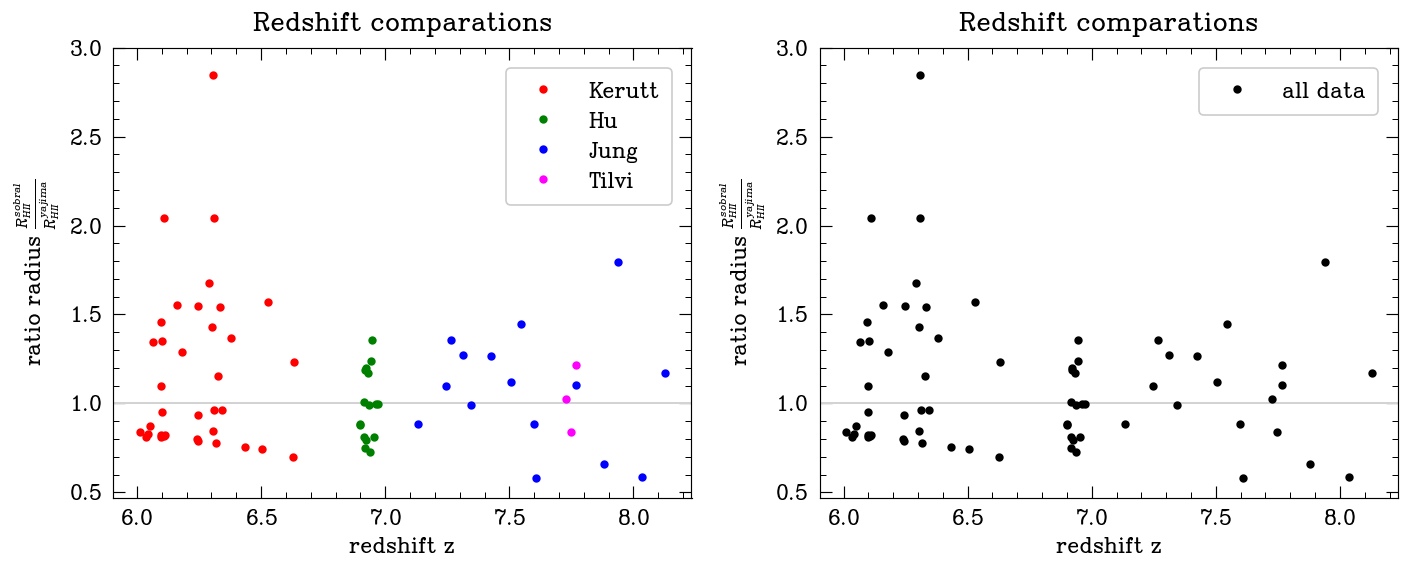

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# PLOT 1 --------------------------------------------------------------------------------------------------------------------------

# Data: redshift
tilvi_z = Tilvi20_filter_v1['z_spec'].value
jung_z = Jung20_filter_v1['z_Lya'].value
hu18_z = Hu18_filter_v1['Redshift'].value
kerutt22_z = Kerutt22_filter_v1['z'].value

# Comparative plots: redshift
ax1.axhline(y=1, color='lightgray', linestyle='-')
ax1.plot(kerutt22_z, ratio_radius[:len(kerutt22_z)], '.', color='red', label='Kerutt')
ax1.plot(hu18_z, ratio_radius[len(kerutt22_z):len(kerutt22_z)+len(hu18_z,)], '.', color='green', label='Hu')
ax1.plot(jung_z, ratio_radius[len(kerutt22_z)+len(hu18_z):len(kerutt22_z)+len(hu18_z)+len(jung_z)], '.', color='blue', label='Jung')
ax1.plot(tilvi_z, ratio_radius[len(kerutt22_z)+len(hu18_z)+len(jung_z):], '.', color='magenta', label='Tilvi')

ax1.set_xlabel('redshift z')
ax1.set_ylabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
ax1.set_ylim(top = 3)
ax1.legend(frameon=True)
ax1.set_title('Redshift comparations')

# PLOT 2 --------------------------------------------------------------------------------------------------------------------------

# Data: redshift
z = np.concatenate([Kerutt22_filter_v1['z'].value,
                           Hu18_filter_v1['Redshift'].value,
                           Jung20_filter_v1['z_Lya'].value,
                           Tilvi20_filter_v1['z_spec'].value])

# Comparative plots: redshift
ax2.axhline(y=1, color='lightgray', linestyle='-')
ax2.plot(z, ratio_radius, '.', color='black', label='all data')

ax2.set_xlabel('redshift z')
ax2.set_ylabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
ax2.set_title('Redshift comparations')
ax2.set_ylim(top = 3)
ax2.legend(frameon=True)

plt.tight_layout()
plt.show()

#### Anchura equivalente (EW)

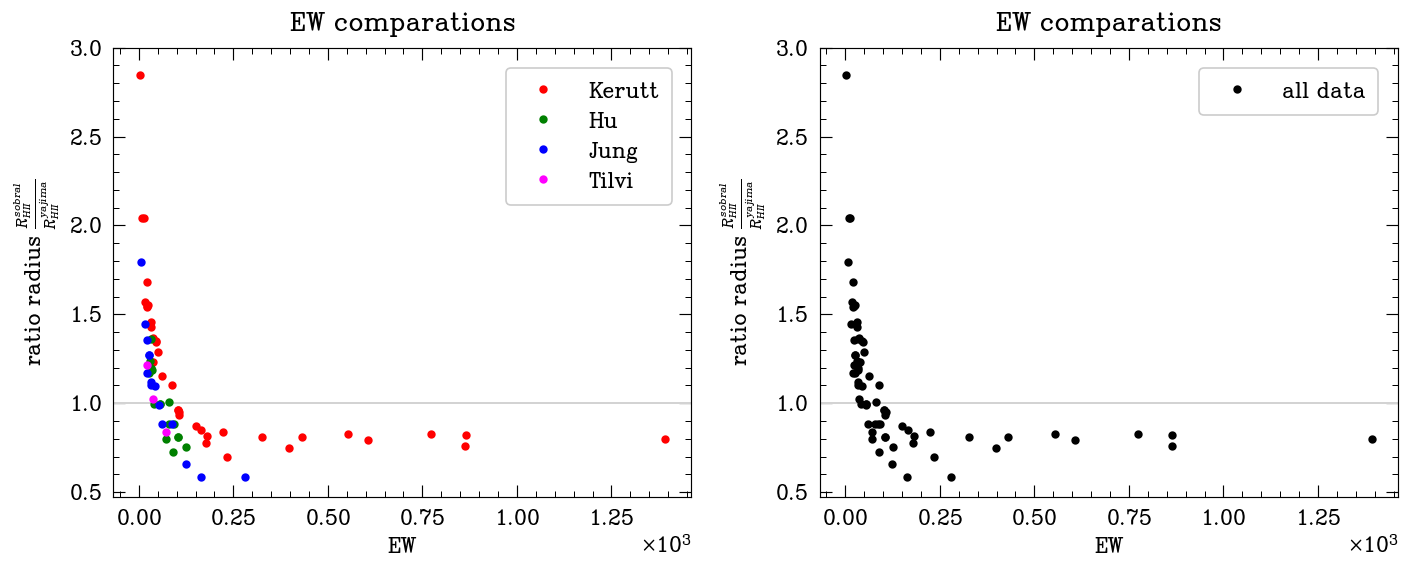

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# PLOT 1 --------------------------------------------------------------------------------------------------------------------------

# Data: EW
tilvi_EW = Tilvi20_filter_v1['EW_rest'].value
jung_EW = Jung20_filter_v1['EW_Lya'].value
hu18_EW = Hu18_filter_v1['EW_HU'].value
kerutt22_EW = Kerutt22_filter_v1['EW0'].value

# Comparative plots: EW
ax1.axhline(y=1, color='lightgray', linestyle='-')
ax1.plot(kerutt22_EW, ratio_radius[:len(kerutt22_EW)], '.', color='red', label='Kerutt')
ax1.plot(hu18_EW, ratio_radius[len(kerutt22_EW):len(kerutt22_EW)+len(hu18_EW,)], '.', color='green', label='Hu')
ax1.plot(jung_EW, ratio_radius[len(kerutt22_EW)+len(hu18_EW):len(kerutt22_EW)+len(hu18_z)+len(jung_z)], '.', color='blue', label='Jung')
ax1.plot(tilvi_EW, ratio_radius[len(kerutt22_EW)+len(hu18_EW)+len(jung_EW):], '.', color='magenta', label='Tilvi')

ax1.set_xlabel('EW')
ax1.set_ylabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
ax1.set_ylim(top = 3)
ax1.legend(frameon=True)
ax1.set_title('EW comparations')

# PLOT 2 --------------------------------------------------------------------------------------------------------------------------

# Data: EW
EW = np.concatenate([Kerutt22_filter_v1['EW0'].value,
                           Hu18_filter_v1['EW_HU'].value,
                           Jung20_filter_v1['EW_Lya'].value,
                           Tilvi20_filter_v1['EW_rest'].value])

# Comparative plots: EW
ax2.axhline(y=1, color='lightgray', linestyle='-')
ax2.plot(EW, ratio_radius, '.', color='black', label='all data')

ax2.set_xlabel('EW')
ax2.set_ylabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
ax2.set_title('EW comparations')
ax2.set_ylim(top = 3)
ax2.legend(frameon=True)

plt.tight_layout()
plt.show()

#### Luminosidad Lyman alpha $(log(L_{Ly \alpha}))$

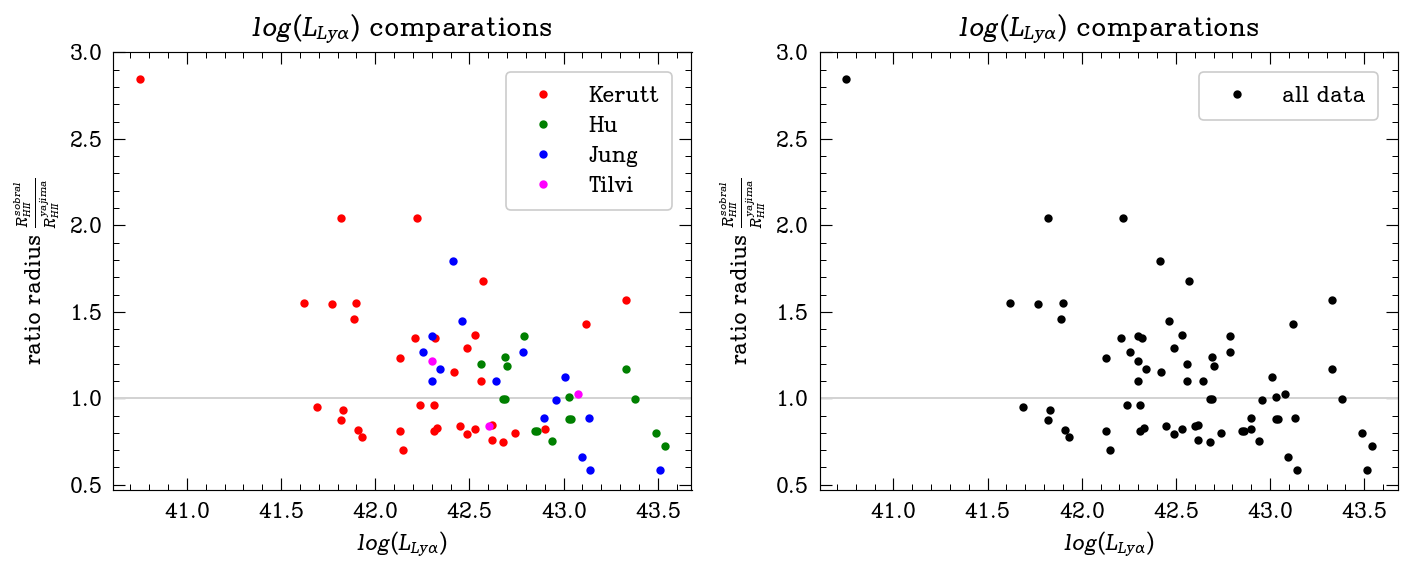

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# PLOT 1 --------------------------------------------------------------------------------------------------------------------------

# Data: logLLya
tilvi_logLLya = Tilvi20_filter_v1['logLLya'].value
jung_logLLya = Jung20_filter_v1['logLLya'].value
hu18_logLLya = Hu18_filter_v1['logLLya'].value
kerutt22_logLLya = Kerutt22_filter_v1['logLLya'].value

# Comparative plots: logLLya
ax1.axhline(y=1, color='lightgray', linestyle='-')
ax1.plot(kerutt22_logLLya, ratio_radius[:len(kerutt22_logLLya)], '.', color='red', label='Kerutt')
ax1.plot(hu18_logLLya, ratio_radius[len(kerutt22_logLLya):len(kerutt22_logLLya)+len(hu18_logLLya,)], '.', color='green', label='Hu')
ax1.plot(jung_logLLya, ratio_radius[len(kerutt22_logLLya)+len(hu18_logLLya):len(kerutt22_logLLya)+len(hu18_z)+len(jung_z)], '.', color='blue', label='Jung')
ax1.plot(tilvi_logLLya, ratio_radius[len(kerutt22_logLLya)+len(hu18_logLLya)+len(jung_logLLya):], '.', color='magenta', label='Tilvi')

ax1.set_xlabel(r'$log(L_{Ly \alpha})$')
ax1.set_ylabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
ax1.set_ylim(top = 3)
ax1.legend(frameon=True)
ax1.set_title(r'$log(L_{Ly \alpha})$ comparations')

# PLOT 2 --------------------------------------------------------------------------------------------------------------------------

# Data: logLLya
logLLya = np.concatenate([Kerutt22_filter_v1['logLLya'].value,
                           Hu18_filter_v1['logLLya'].value,
                           Jung20_filter_v1['logLLya'].value,
                           Tilvi20_filter_v1['logLLya'].value])

# Comparative plots: logLLya
ax2.axhline(y=1, color='lightgray', linestyle='-')
ax2.plot(logLLya, ratio_radius, '.', color='black', label='all data')

ax2.set_xlabel(r'$log(L_{Ly \alpha})$')
ax2.set_ylabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
ax2.set_title(r'$log(L_{Ly \alpha})$ comparations')
ax2.set_ylim(top = 3)
ax2.legend(frameon=True)

plt.tight_layout()
plt.show()

#### Fracción de escape ($f_{esc, Lya}$)

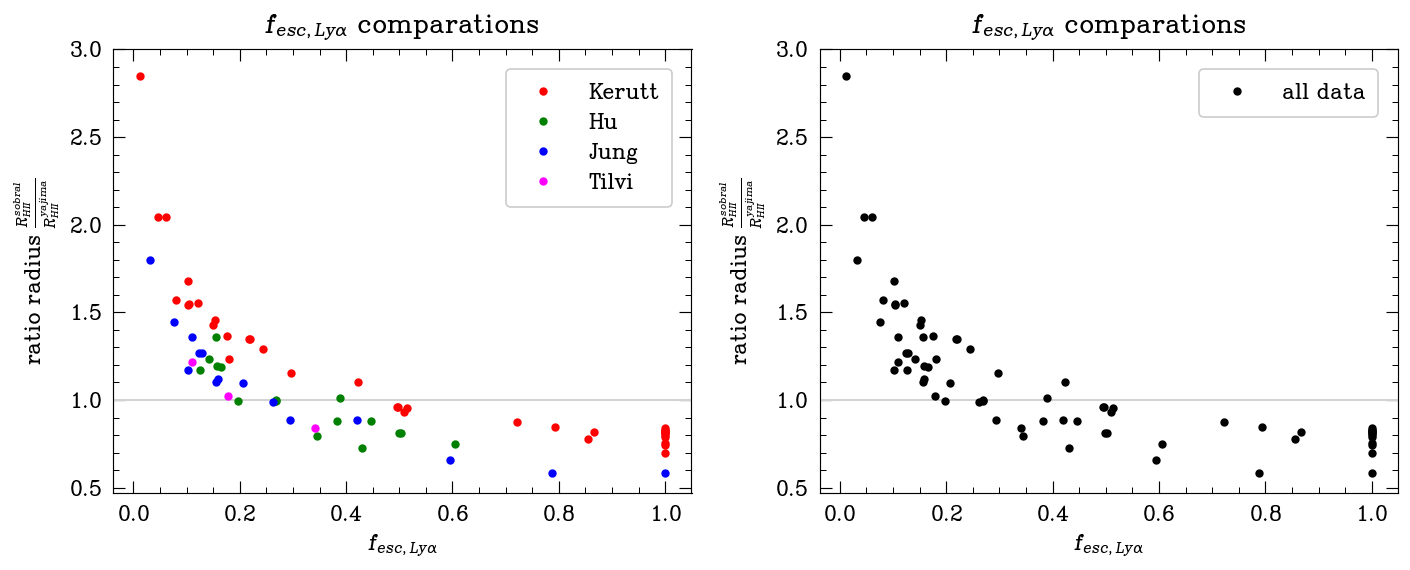

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# PLOT 1 --------------------------------------------------------------------------------------------------------------------------

# Data: f_esc
tilvi_f_esc = Tilvi20_filter_v1['f_esc_Lya'].value
jung_f_esc = Jung20_filter_v1['f_esc_Lya'].value
hu18_f_esc = Hu18_filter_v1['f_esc_Lya'].value
kerutt22_f_esc = Kerutt22_filter_v1['f_esc_Lya'].value

# Comparative plots: f_esc
ax1.axhline(y=1, color='lightgray', linestyle='-')
ax1.plot(kerutt22_f_esc, ratio_radius[:len(kerutt22_f_esc)], '.', color='red', label='Kerutt')
ax1.plot(hu18_f_esc, ratio_radius[len(kerutt22_f_esc):len(kerutt22_f_esc)+len(hu18_f_esc,)], '.', color='green', label='Hu')
ax1.plot(jung_f_esc, ratio_radius[len(kerutt22_f_esc)+len(hu18_f_esc):len(kerutt22_f_esc)+len(hu18_z)+len(jung_z)], '.', color='blue', label='Jung')
ax1.plot(tilvi_f_esc, ratio_radius[len(kerutt22_f_esc)+len(hu18_f_esc)+len(jung_f_esc):], '.', color='magenta', label='Tilvi')

ax1.set_xlabel(r'$f_{esc, Ly\alpha}$')
ax1.set_ylabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
ax1.set_ylim(top = 3)
ax1.legend(frameon=True)
ax1.set_title(r'$f_{esc, Ly\alpha}$ comparations')

# PLOT 2 --------------------------------------------------------------------------------------------------------------------------

# Data: f_esc
f_esc = np.concatenate([Kerutt22_filter_v1['f_esc_Lya'].value,
                           Hu18_filter_v1['f_esc_Lya'].value,
                           Jung20_filter_v1['f_esc_Lya'].value,
                           Tilvi20_filter_v1['f_esc_Lya'].value])

# Comparative plots: f_esc
ax2.axhline(y=1, color='lightgray', linestyle='-')
ax2.plot(f_esc, ratio_radius, '.', color='black', label='all data')

ax2.set_xlabel(r'$f_{esc, Ly\alpha}$')
ax2.set_ylabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
ax2.set_ylim(top = 3)
ax2.set_title(r'$f_{esc, Ly\alpha}$ comparations')
ax2.legend(frameon=True)

plt.tight_layout()
plt.show()

## 2.1. Histogram of ratio relations

Por último, representamos un histograma de $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$ para ver su distribución.

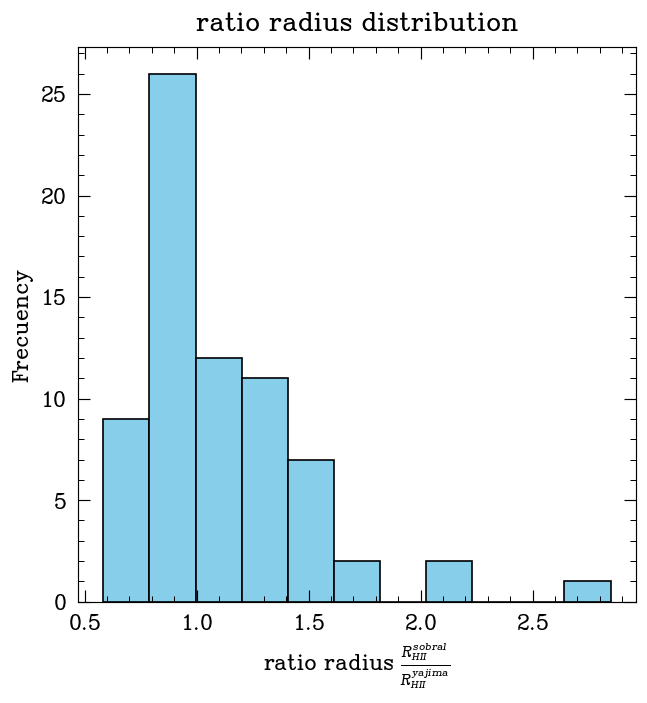

In [10]:
# Histograma
bins_fd = np.histogram_bin_edges(ratio_radius, bins = 'fd')

plt.hist(ratio_radius, bins = bins_fd, color = 'skyblue', edgecolor = 'black') 
plt.xlabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
plt.ylabel('Frecuency')
plt.title(r'ratio radius distribution')

plt.show()

## 3. Plots: $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$ vs all parameters with $f_{esc, Ly \alpha}$ = 0.6 in $R^{sobral}_{HII}$ relation

En esta última sección vamos a repetir el proceso del apartado 2 pero asumiendo, a la hora de calcular $R^{sobral}_{HII}$ por el método de Sobral, una $f_{esc, Ly \alpha}$ = 0.6. La idea es poder comparar de forma mas realista la relación $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$ vs all parameters puesto que Yajima asume una $f_{esc, Ly \alpha}$ = 0.6 para calcular $R^{yajima}_{HII}$. Es decir, queremos que tanto $R^{yajima}_{HII}$ como $R^{sobral}_{HII}$ hayan sido calcualdos asumiendo una misma $f_{esc, Ly \alpha}$.

Utilizamos la función ya creada y empleada en cuadernos anteriores para calcular radios de Strömgren pero ahora suminedo $f_{esc, Ly \alpha}$ = 0.6.

In [11]:
# Strömgen radius calculation using equivalent width (EW), log10(observed luminosity of Lymann alpha) and redshift
# Units: EW in angstroms; logLLya in dex(erg/s); z (adimensional)
# Asumming f_esc_Lya = 0.6
def R_s_f06(EW, logLLya, redshift):

    # recombination coefficinet for T_e = 10⁴K
    alphaB = 8.8 * 10**(-87)

    # C_H(z) parameter
    def C_H(redshift):
        z_values = [6 ,7 , 8]
        C_H_values = [2.37, 2.28, 2.19]
        C_H = np.interp(redshift, z_values,C_H_values) 
        return C_H

    # Hydrogen density
    def n_H (redshift):
        n_H = 5.878 * 10**66 * (1+redshift)**3
        return n_H

    # Escape fraction of Lymann alpha = 0.6 (assumed)
    f_esc_Lya = 0.6

    # log10(intrisic luminosity of Lymann alpha)
    logLLya_int = np.log10(10**logLLya/f_esc_Lya)

    # Effective number of ionizinz continuum photones per second
    logQ_ion = np.log10(10**logLLya_int / (1.19*10**(-11)))

    # Nuber of ionizing continuum photones that participate in reionizing the IGM
    f_esc_LyC = 0.2 # assumed f_esc_LyC
    N_ion = (10**logQ_ion) / (1 - f_esc_LyC) * f_esc_LyC

    # Strömgen radius (proper)
    R_s = (3 * N_ion / (4 * np.pi * C_H(redshift) * n_H(redshift)**2 * alphaB))**(1/3)

    # Strömgen radius (comovil)
    R_s_com = (1 + redshift) * R_s
    
    return np.round(R_s,3) * pMpc, np.round(R_s_com,3) * cMpc, np.round(f_esc_Lya,3), np.round(logLLya_int,3) * u.dex(u.erg / u.s), np.round(logQ_ion,3)  * u.dex(1 / u.s), np.round(EW,2)  * u.angstrom, np.round(np.log10(N_ion),3) * u.dex(1 / u.s)

Utilizando la función anterior, ya podemos calcular `ratio_radius` y hacer los plots de la sección anterior. 

In [12]:
# Correction: cMpc to pMcp
R_s_prop_Hu = Hu18_filter_v1['R'].value / (1 + Hu18_filter_v1['Redshift'].value) * pMpc # radios Strömgren por Yajima de cMpc to pMpc

# Strömgren radius calcualted by Sobral Relation
R_s_sobral_f06 = np.concatenate([R_s_f06(Kerutt22_filter_v1['EW0'].value,Kerutt22_filter_v1['logLLya'].value,Kerutt22_filter_v1['z'].value)[0].value,
                           R_s_f06(Hu18_filter_v1['EW_HU'].value,Hu18_filter_v1['logLLya'].value,Hu18_filter_v1['Redshift'].value)[0].value,
                           R_s_f06(Jung20_filter_v1['EW_Lya'].value,Jung20_filter_v1['logLLya'].value,Jung20_filter_v1['z_Lya'].value)[0].value,
                           R_s_f06(Tilvi20_filter_v1['EW_rest'].value,Tilvi20_filter_v1['logLLya'].value,Tilvi20_filter_v1['z_spec'].value)[0].value]) # Strömgren radius calcualted by Sobral Relation

R_s_yajima = np.concatenate([Kerutt22_filter_v1['R_HII'].value,
                           R_s_prop_Hu.value,
                           Jung20_filter_v1['HII_Radii'].value,
                           Tilvi20_filter_v1['HII_radii'].value]) # Strömgren radius calcualted by Yajima

# Radius ratio
ratio_radius_f06 = R_s_sobral_f06 / R_s_yajima

#### Redshift (z)

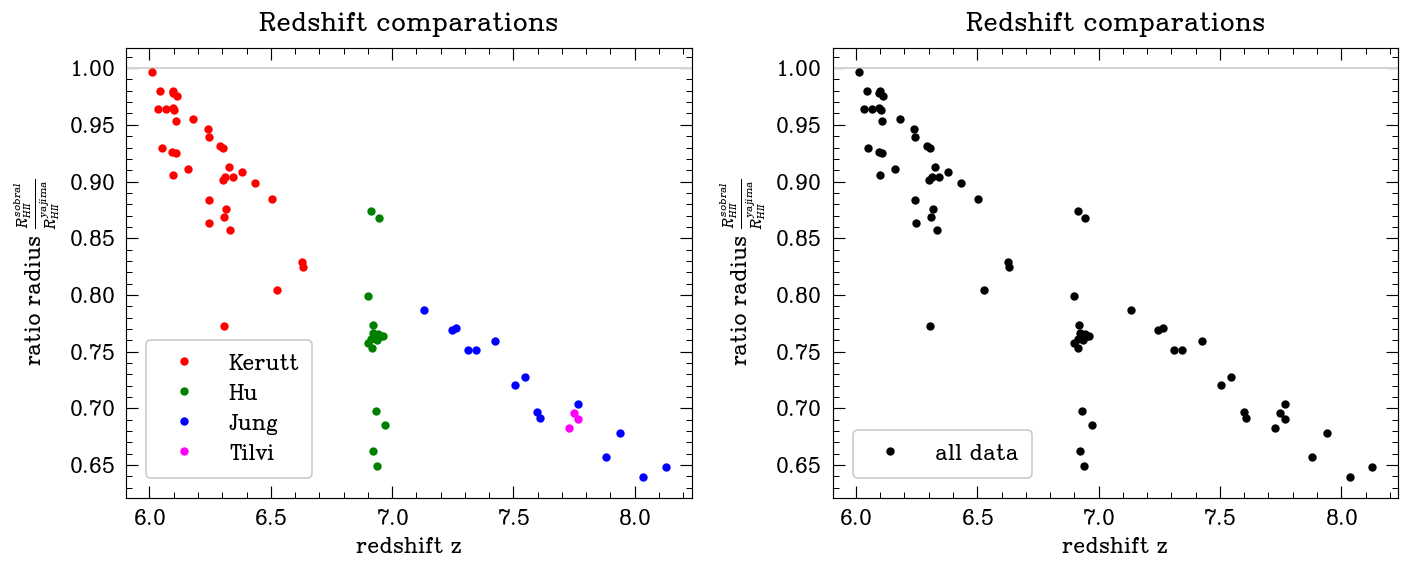

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# PLOT 1 --------------------------------------------------------------------------------------------------------------------------

# Data: redshift
tilvi_z = Tilvi20_filter_v1['z_spec'].value
jung_z = Jung20_filter_v1['z_Lya'].value
hu18_z = Hu18_filter_v1['Redshift'].value
kerutt22_z = Kerutt22_filter_v1['z'].value

# Comparative plots: redshift
ax1.axhline(y=1, color='lightgray', linestyle='-')
ax1.plot(kerutt22_z, ratio_radius_f06[:len(kerutt22_z)], '.', color='red', label='Kerutt')
ax1.plot(hu18_z, ratio_radius_f06[len(kerutt22_z):len(kerutt22_z)+len(hu18_z,)], '.', color='green', label='Hu')
ax1.plot(jung_z, ratio_radius_f06[len(kerutt22_z)+len(hu18_z):len(kerutt22_z)+len(hu18_z)+len(jung_z)], '.', color='blue', label='Jung')
ax1.plot(tilvi_z, ratio_radius_f06[len(kerutt22_z)+len(hu18_z)+len(jung_z):], '.', color='magenta', label='Tilvi')

ax1.set_xlabel('redshift z')
ax1.set_ylabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
ax1.legend(frameon=True)
ax1.set_title('Redshift comparations')

# PLOT 2 --------------------------------------------------------------------------------------------------------------------------

# Data: redshift
z = np.concatenate([Kerutt22_filter_v1['z'].value,
                           Hu18_filter_v1['Redshift'].value,
                           Jung20_filter_v1['z_Lya'].value,
                           Tilvi20_filter_v1['z_spec'].value])

# Comparative plots: redshift
ax2.axhline(y=1, color='lightgray', linestyle='-')
ax2.plot(z, ratio_radius_f06, '.', color='black', label='all data')

ax2.set_xlabel('redshift z')
ax2.set_ylabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
ax2.set_title('Redshift comparations')
ax2.legend(frameon=True)

plt.tight_layout()
plt.show()

#### Anchura equivalente (EW)

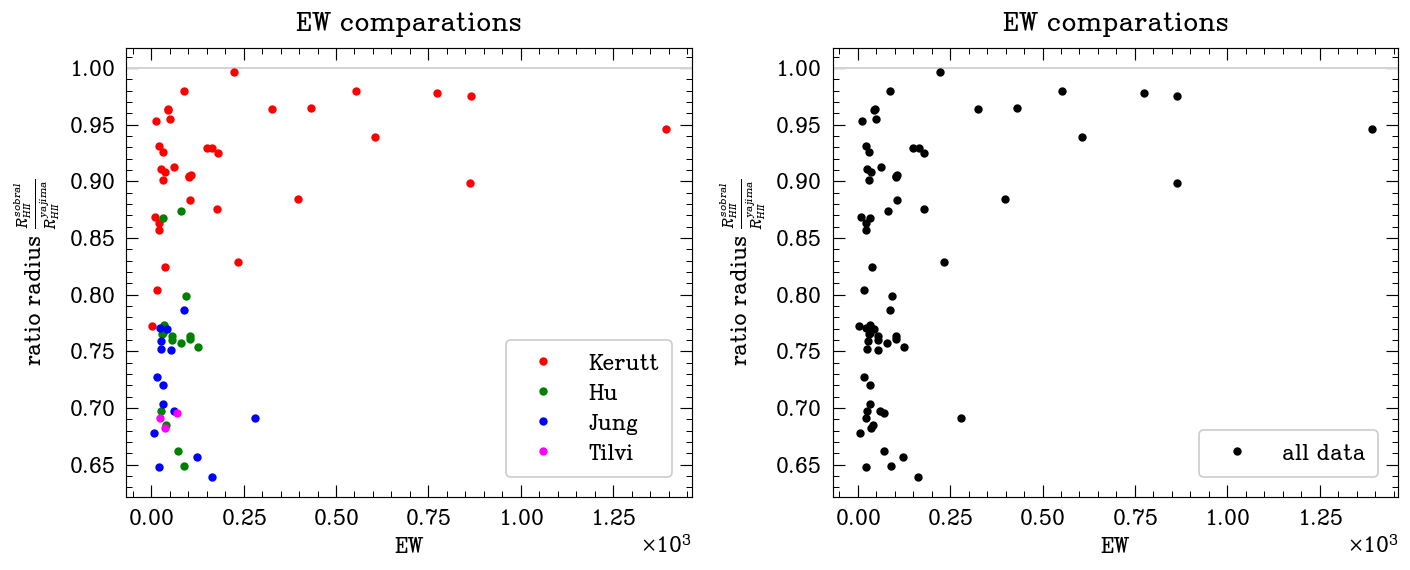

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# PLOT 1 --------------------------------------------------------------------------------------------------------------------------

# Data: EW
tilvi_EW = Tilvi20_filter_v1['EW_rest'].value
jung_EW = Jung20_filter_v1['EW_Lya'].value
hu18_EW = Hu18_filter_v1['EW_HU'].value
kerutt22_EW = Kerutt22_filter_v1['EW0'].value

# Comparative plots: EW
ax1.axhline(y=1, color='lightgray', linestyle='-')
ax1.plot(kerutt22_EW, ratio_radius_f06[:len(kerutt22_EW)], '.', color='red', label='Kerutt')
ax1.plot(hu18_EW, ratio_radius_f06[len(kerutt22_EW):len(kerutt22_EW)+len(hu18_EW,)], '.', color='green', label='Hu')
ax1.plot(jung_EW, ratio_radius_f06[len(kerutt22_EW)+len(hu18_EW):len(kerutt22_EW)+len(hu18_z)+len(jung_z)], '.', color='blue', label='Jung')
ax1.plot(tilvi_EW, ratio_radius_f06[len(kerutt22_EW)+len(hu18_EW)+len(jung_EW):], '.', color='magenta', label='Tilvi')

ax1.set_xlabel('EW')
ax1.set_ylabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
ax1.legend(frameon=True)
ax1.set_title('EW comparations')

# PLOT 2 --------------------------------------------------------------------------------------------------------------------------

# Data: EW
EW = np.concatenate([Kerutt22_filter_v1['EW0'].value,
                           Hu18_filter_v1['EW_HU'].value,
                           Jung20_filter_v1['EW_Lya'].value,
                           Tilvi20_filter_v1['EW_rest'].value])

# Comparative plots: EW
ax2.axhline(y=1, color='lightgray', linestyle='-')
ax2.plot(EW, ratio_radius_f06, '.', color='black', label='all data')

ax2.set_xlabel('EW')
ax2.set_ylabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
ax2.set_title('EW comparations')
ax2.legend(frameon=True)

plt.tight_layout()
plt.show()

#### Luminosidad Lyman alpha $(log(L_{Ly \alpha}))$

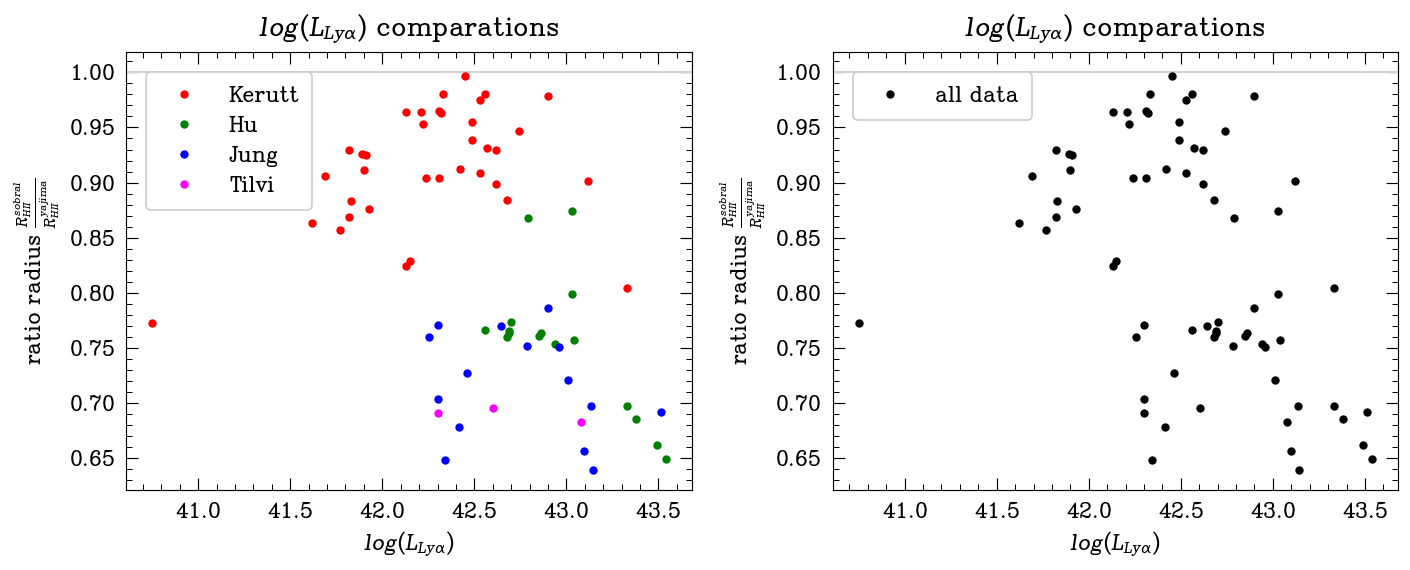

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# PLOT 1 --------------------------------------------------------------------------------------------------------------------------

# Data: logLLya
tilvi_logLLya = Tilvi20_filter_v1['logLLya'].value
jung_logLLya = Jung20_filter_v1['logLLya'].value
hu18_logLLya = Hu18_filter_v1['logLLya'].value
kerutt22_logLLya = Kerutt22_filter_v1['logLLya'].value

# Comparative plots: logLLya
ax1.axhline(y=1, color='lightgray', linestyle='-')
ax1.plot(kerutt22_logLLya, ratio_radius_f06[:len(kerutt22_logLLya)], '.', color='red', label='Kerutt')
ax1.plot(hu18_logLLya, ratio_radius_f06[len(kerutt22_logLLya):len(kerutt22_logLLya)+len(hu18_logLLya,)], '.', color='green', label='Hu')
ax1.plot(jung_logLLya, ratio_radius_f06[len(kerutt22_logLLya)+len(hu18_logLLya):len(kerutt22_logLLya)+len(hu18_z)+len(jung_z)], '.', color='blue', label='Jung')
ax1.plot(tilvi_logLLya, ratio_radius_f06[len(kerutt22_logLLya)+len(hu18_logLLya)+len(jung_logLLya):], '.', color='magenta', label='Tilvi')

ax1.set_xlabel(r'$log(L_{Ly \alpha})$')
ax1.set_ylabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
ax1.legend(frameon=True)
ax1.set_title(r'$log(L_{Ly \alpha})$ comparations')

# PLOT 2 --------------------------------------------------------------------------------------------------------------------------

# Data: logLLya
logLLya = np.concatenate([Kerutt22_filter_v1['logLLya'].value,
                           Hu18_filter_v1['logLLya'].value,
                           Jung20_filter_v1['logLLya'].value,
                           Tilvi20_filter_v1['logLLya'].value])

# Comparative plots: logLLya
ax2.axhline(y=1, color='lightgray', linestyle='-')
ax2.plot(logLLya, ratio_radius_f06, '.', color='black', label='all data')

ax2.set_xlabel(r'$log(L_{Ly \alpha})$')
ax2.set_ylabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
ax2.set_title(r'$log(L_{Ly \alpha})$ comparations')
ax2.legend(frameon=True)

plt.tight_layout()
plt.show()

#### Fracción de escape ($f_{esc, Lya}$)

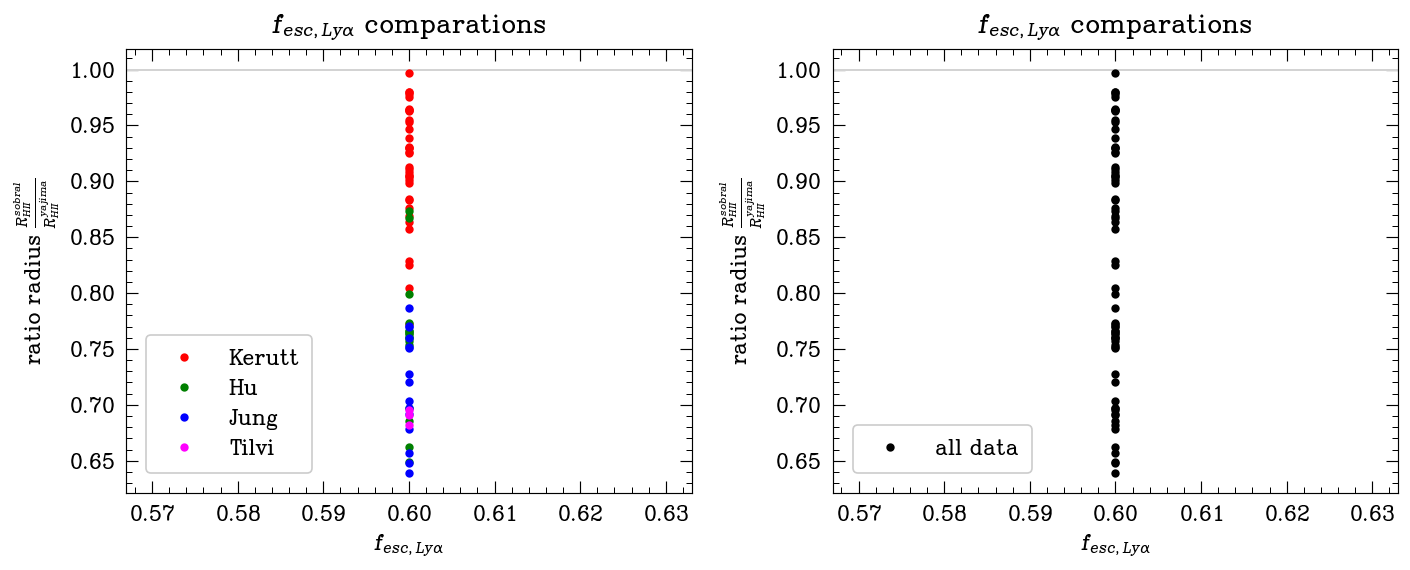

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# PLOT 1 --------------------------------------------------------------------------------------------------------------------------

# Data: f_esc
tilvi_f_esc = Tilvi20_filter_v1['f_esc_Lya'].value
jung_f_esc = Jung20_filter_v1['f_esc_Lya'].value
hu18_f_esc = Hu18_filter_v1['f_esc_Lya'].value
kerutt22_f_esc = Kerutt22_filter_v1['f_esc_Lya'].value

# Comparative plots: f_esc
ax1.axhline(y=1, color='lightgray', linestyle='-')
ax1.plot([0.6] * len(kerutt22_f_esc), ratio_radius_f06[:len(kerutt22_f_esc)], '.', color='red', label='Kerutt')
ax1.plot([0.6] * len(hu18_f_esc), ratio_radius_f06[len(kerutt22_f_esc):len(kerutt22_f_esc)+len(hu18_f_esc,)], '.', color='green', label='Hu')
ax1.plot([0.6] * len(jung_f_esc), ratio_radius_f06[len(kerutt22_f_esc)+len(hu18_f_esc):len(kerutt22_f_esc)+len(hu18_z)+len(jung_z)], '.', color='blue', label='Jung')
ax1.plot([0.6] * len(tilvi_f_esc), ratio_radius_f06[len(kerutt22_f_esc)+len(hu18_f_esc)+len(jung_f_esc):], '.', color='magenta', label='Tilvi')

ax1.set_xlabel(r'$f_{esc, Ly\alpha}$')
ax1.set_ylabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
ax1.legend(frameon=True)
ax1.set_title(r'$f_{esc, Ly\alpha}$ comparations')

# PLOT 2 --------------------------------------------------------------------------------------------------------------------------

# Data: f_esc
f_esc = np.concatenate([Kerutt22_filter_v1['f_esc_Lya'].value,
                           Hu18_filter_v1['f_esc_Lya'].value,
                           Jung20_filter_v1['f_esc_Lya'].value,
                           Tilvi20_filter_v1['f_esc_Lya'].value])

# Comparative plots: f_esc
ax2.axhline(y=1, color='lightgray', linestyle='-')
ax2.plot([0.6] * len(ratio_radius_f06), ratio_radius_f06, '.', color='black', label='all data')

ax2.set_xlabel(r'$f_{esc, Ly\alpha}$')
ax2.set_ylabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
ax2.set_title(r'$f_{esc, Ly\alpha}$ comparations')
ax2.legend(frameon=True)

plt.tight_layout()
plt.show()

## 3.1. Histogram of ratio relations

Por último, representamos un histograma de $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$ para ver su distribución para este caso de $f_{esc,Ly\alpha}$ = 0.6.

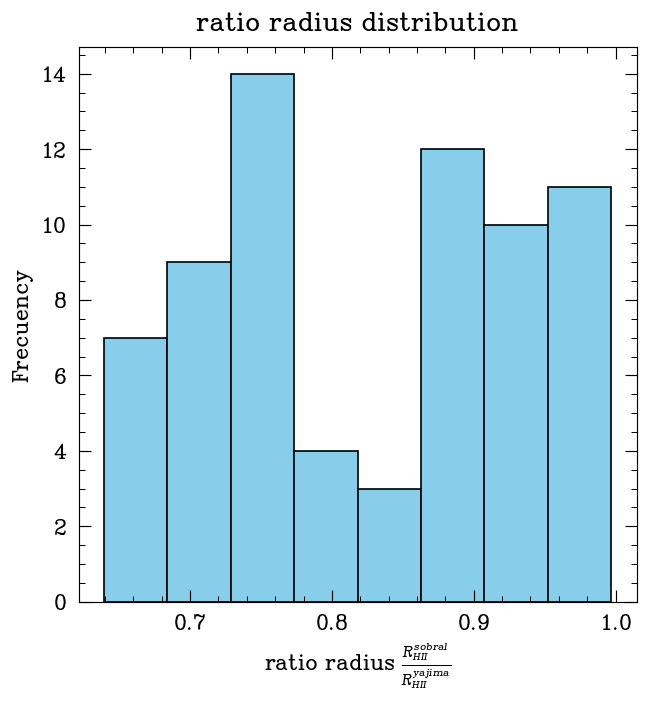

In [17]:
# Histograma
bins_fd = np.histogram_bin_edges(ratio_radius_f06, bins = 'fd')

plt.hist(ratio_radius_f06, bins = 8, color = 'skyblue', edgecolor = 'black') 
plt.xlabel(r'ratio radius $\frac{R^{sobral}_{HII}}{R^{yajima}_{HII}}$')
plt.ylabel('Frecuency')
plt.title(r'ratio radius distribution')

plt.show()

## 4. $R^{sobral}_{HII}$ vs redshift

Para complementar, vamos representar el radio de Strömgren calculado a partir de la relación de Sobral, tanto en distancia propia (_pMpc_) como en comóvil (_cMpc_) en función del redshift. 

Recuerde que siempre que hablamos de radio de Strömgren calculado a partir de la relación de Sobral queremos decir utilizando la relación de Sobral que permite calucular la fracción de escape de fotones Lyman alpha en función de su anchura equivalente. 

### 4.1. Con la relación de Sobral

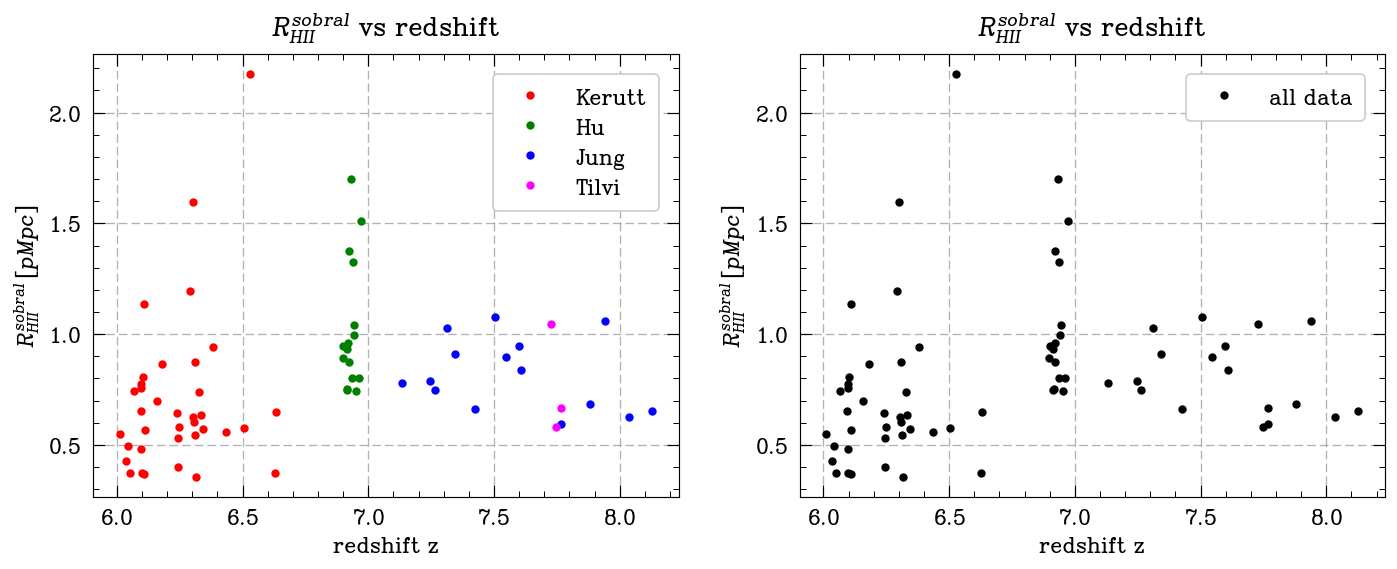

In [54]:
# R_{HII}[pMpc] vs redshift
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# PLOT 1 --------------------------------------------------------------------------------------------------------------------------

# Data: redshift
tilvi_z = Tilvi20_filter_v1['z_spec'].value
jung_z = Jung20_filter_v1['z_Lya'].value
hu18_z = Hu18_filter_v1['Redshift'].value
kerutt22_z = Kerutt22_filter_v1['z'].value

# Comparative plots: redshift
ax1.grid()
ax1.plot(kerutt22_z, R_s_sobral[:len(kerutt22_z)], '.', color='red', label='Kerutt')
ax1.plot(hu18_z, R_s_sobral[len(kerutt22_z):len(kerutt22_z)+len(hu18_z,)], '.', color='green', label='Hu')
ax1.plot(jung_z, R_s_sobral[len(kerutt22_z)+len(hu18_z):len(kerutt22_z)+len(hu18_z)+len(jung_z)], '.', color='blue', label='Jung')
ax1.plot(tilvi_z, R_s_sobral[len(kerutt22_z)+len(hu18_z)+len(jung_z):], '.', color='magenta', label='Tilvi')

ax1.set_xlabel('redshift z')
ax1.set_ylabel(r'$R^{sobral}_{HII}\,[pMpc]$')
ax1.legend(frameon=True)
ax1.set_title('$R^{sobral}_{HII}$ vs redshift')

# PLOT 2 --------------------------------------------------------------------------------------------------------------------------

# Data: redshift
z = np.concatenate([Kerutt22_filter_v1['z'].value,
                           Hu18_filter_v1['Redshift'].value,
                           Jung20_filter_v1['z_Lya'].value,
                           Tilvi20_filter_v1['z_spec'].value])

# Comparative plots: redshift
ax2.grid()
ax2.plot(z, R_s_sobral, '.', color='black', label='all data')

ax2.set_xlabel('redshift z')
ax2.set_ylabel(r'$R^{sobral}_{HII}\,[pMpc]$')
ax2.set_title('$R^{sobral}_{HII}$ vs redshift')
ax2.legend(frameon=True)

plt.tight_layout()
plt.show()

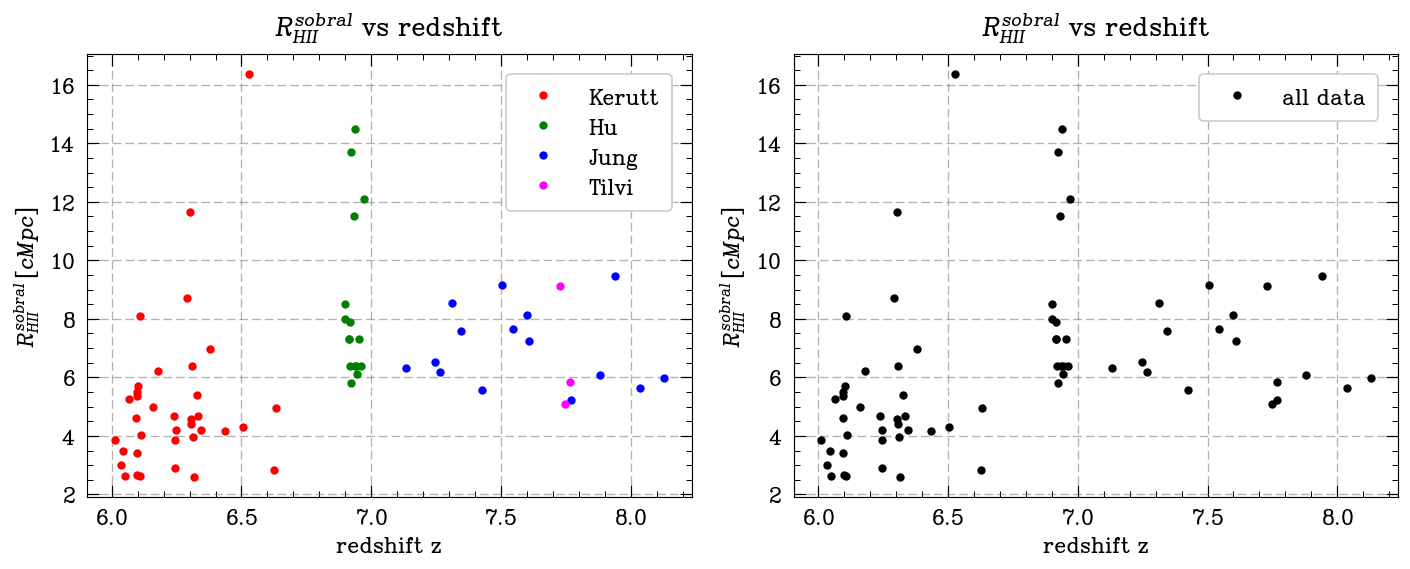

In [53]:
# R_{HII}[cMpc] vs redshift
R_s_sobral_com = np.concatenate([Kerutt22_filter_v1['R_s_com'].value,
                           Hu18_filter_v1['R'].value,
                           Jung20_filter_v1['R_s_com'].value,
                           Tilvi20_filter_v1['R_s_com'].value]) # Strömgren radius calcualted by Sobral Relation (in cMpc)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# PLOT 1 --------------------------------------------------------------------------------------------------------------------------

# Data: redshift
tilvi_z = Tilvi20_filter_v1['z_spec'].value
jung_z = Jung20_filter_v1['z_Lya'].value
hu18_z = Hu18_filter_v1['Redshift'].value
kerutt22_z = Kerutt22_filter_v1['z'].value

# Comparative plots: redshift
ax1.grid()
ax1.plot(kerutt22_z, R_s_sobral_com[:len(kerutt22_z)], '.', color='red', label='Kerutt')
ax1.plot(hu18_z, R_s_sobral_com[len(kerutt22_z):len(kerutt22_z)+len(hu18_z,)], '.', color='green', label='Hu')
ax1.plot(jung_z, R_s_sobral_com[len(kerutt22_z)+len(hu18_z):len(kerutt22_z)+len(hu18_z)+len(jung_z)], '.', color='blue', label='Jung')
ax1.plot(tilvi_z, R_s_sobral_com[len(kerutt22_z)+len(hu18_z)+len(jung_z):], '.', color='magenta', label='Tilvi')

ax1.set_xlabel('redshift z')
ax1.set_ylabel(r'$R^{sobral}_{HII}\,[cMpc]$')
ax1.legend(frameon=True)
ax1.set_title('$R^{sobral}_{HII}$ vs redshift')

# PLOT 2 --------------------------------------------------------------------------------------------------------------------------

# Data: redshift
z = np.concatenate([Kerutt22_filter_v1['z'].value,
                           Hu18_filter_v1['Redshift'].value,
                           Jung20_filter_v1['z_Lya'].value,
                           Tilvi20_filter_v1['z_spec'].value])

# Comparative plots: redshift
ax2.grid()
ax2.plot(z, R_s_sobral_com, '.', color='black', label='all data')

ax2.set_xlabel('redshift z')
ax2.set_ylabel(r'$R^{sobral}_{HII}\,[cMpc]$')
ax2.set_title('$R^{sobral}_{HII}$ vs redshift')
ax2.legend(frameon=True)

plt.tight_layout()
plt.show()

Para la mayoria de las relaciones que hemos ploteado, los datos de _Hu_ (en verde) no parecen seguir el comportamiento de restos de galaxias. Esto se debe muy posiblemente a que se tratan de un protocúmulo. 

### 4.2. Con la relación de Yajima

Hacemos lo mismo pero para el radio de Strömgren calculado con la relación de Yajima. En este caso, lo vamos a hacer sólo para distancia propia. 

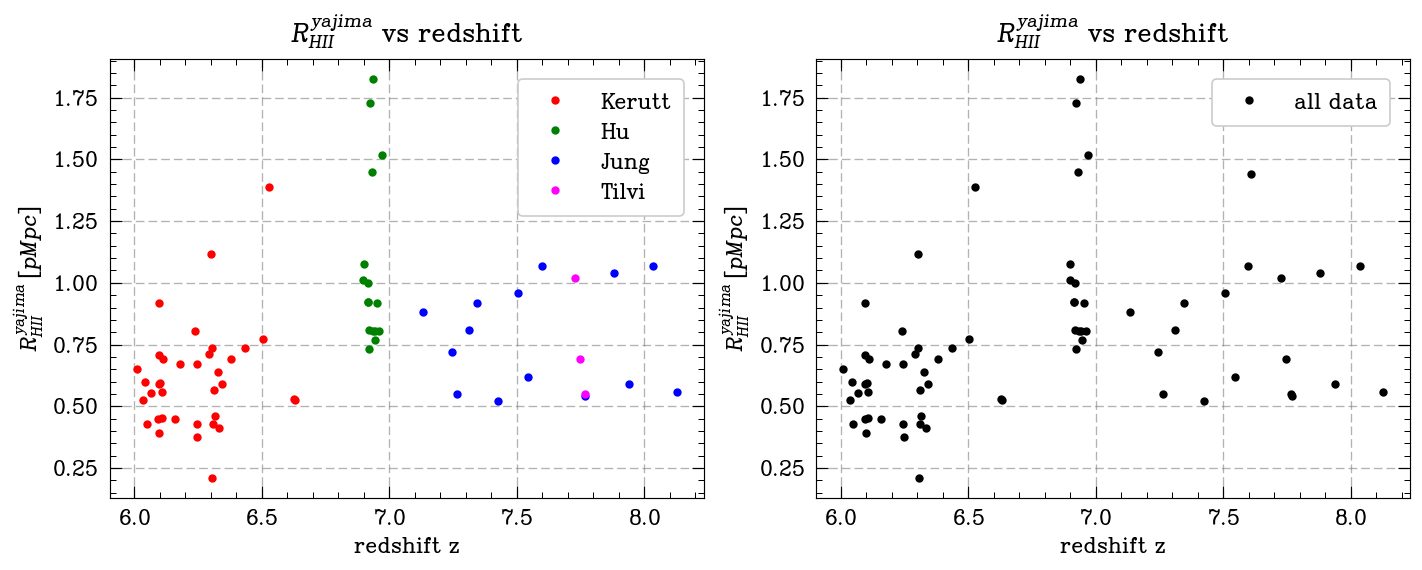

In [56]:
# R_{HII}[pMpc] vs redshift
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# PLOT 1 --------------------------------------------------------------------------------------------------------------------------

# Data: redshift
tilvi_z = Tilvi20_filter_v1['z_spec'].value
jung_z = Jung20_filter_v1['z_Lya'].value
hu18_z = Hu18_filter_v1['Redshift'].value
kerutt22_z = Kerutt22_filter_v1['z'].value

# Comparative plots: redshift
ax1.grid()
ax1.plot(kerutt22_z, R_s_yajima[:len(kerutt22_z)], '.', color='red', label='Kerutt')
ax1.plot(hu18_z, R_s_yajima[len(kerutt22_z):len(kerutt22_z)+len(hu18_z,)], '.', color='green', label='Hu')
ax1.plot(jung_z, R_s_yajima[len(kerutt22_z)+len(hu18_z):len(kerutt22_z)+len(hu18_z)+len(jung_z)], '.', color='blue', label='Jung')
ax1.plot(tilvi_z, R_s_yajima[len(kerutt22_z)+len(hu18_z)+len(jung_z):], '.', color='magenta', label='Tilvi')

ax1.set_xlabel('redshift z')
ax1.set_ylabel(r'$R^{yajima}_{HII}\,[pMpc]$')
ax1.legend(frameon=True)
ax1.set_title('$R^{yajima}_{HII}$ vs redshift')

# PLOT 2 --------------------------------------------------------------------------------------------------------------------------

# Data: redshift
z = np.concatenate([Kerutt22_filter_v1['z'].value,
                           Hu18_filter_v1['Redshift'].value,
                           Jung20_filter_v1['z_Lya'].value,
                           Tilvi20_filter_v1['z_spec'].value])

# Comparative plots: redshift
ax2.grid()
ax2.plot(z, R_s_yajima, '.', color='black', label='all data')

ax2.set_xlabel('redshift z')
ax2.set_ylabel(r'$R^{yajima}_{HII}\,[pMpc]$')
ax2.set_title('$R^{yajima}_{HII}$ vs redshift')
ax2.legend(frameon=True)

plt.tight_layout()
plt.show()